In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from keras.models import Model
from keras.layers import Input, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Load the dataset
breast_Cancer = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/AI Final Project/breast-cancer.csv')

Mounted at /content/drive


In [ ]:
breast_Cancer.info()  #Viewing the dataset info to know their various datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Dropping the "id"because it doesn't have any impact on the dataset

In [ ]:
breast_Cancer = breast_Cancer.drop('id', axis=1)

In [ ]:
breast_Cancer #Display the entire the dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Checking if there are null and missing values in the dataset

In [ ]:
breast_Cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## #Rename Dataset to Label to make it easy to understand

In [ ]:
breast_Cancer = breast_Cancer.rename(columns={'Diagnosis':'Label'})
breast_Cancer.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
breast_Cancer.nunique() #Checking the uniqueness of each variables in the dataset

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [ ]:
breast_Cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#        Encoding the Diagnosis where M=1 and B=0

In [ ]:
# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'diagnosis' column
breast_Cancer['diagnosis'] = label_encoder.fit_transform(breast_Cancer['diagnosis'])

# Display the DataFrame with the converted 'diagnosis' column
breast_Cancer


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
breast_Cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
corr = breast_Cancer.corr()
corr["diagnosis"]

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

# Virtualizing the correlations between the features variables and Diagnosis

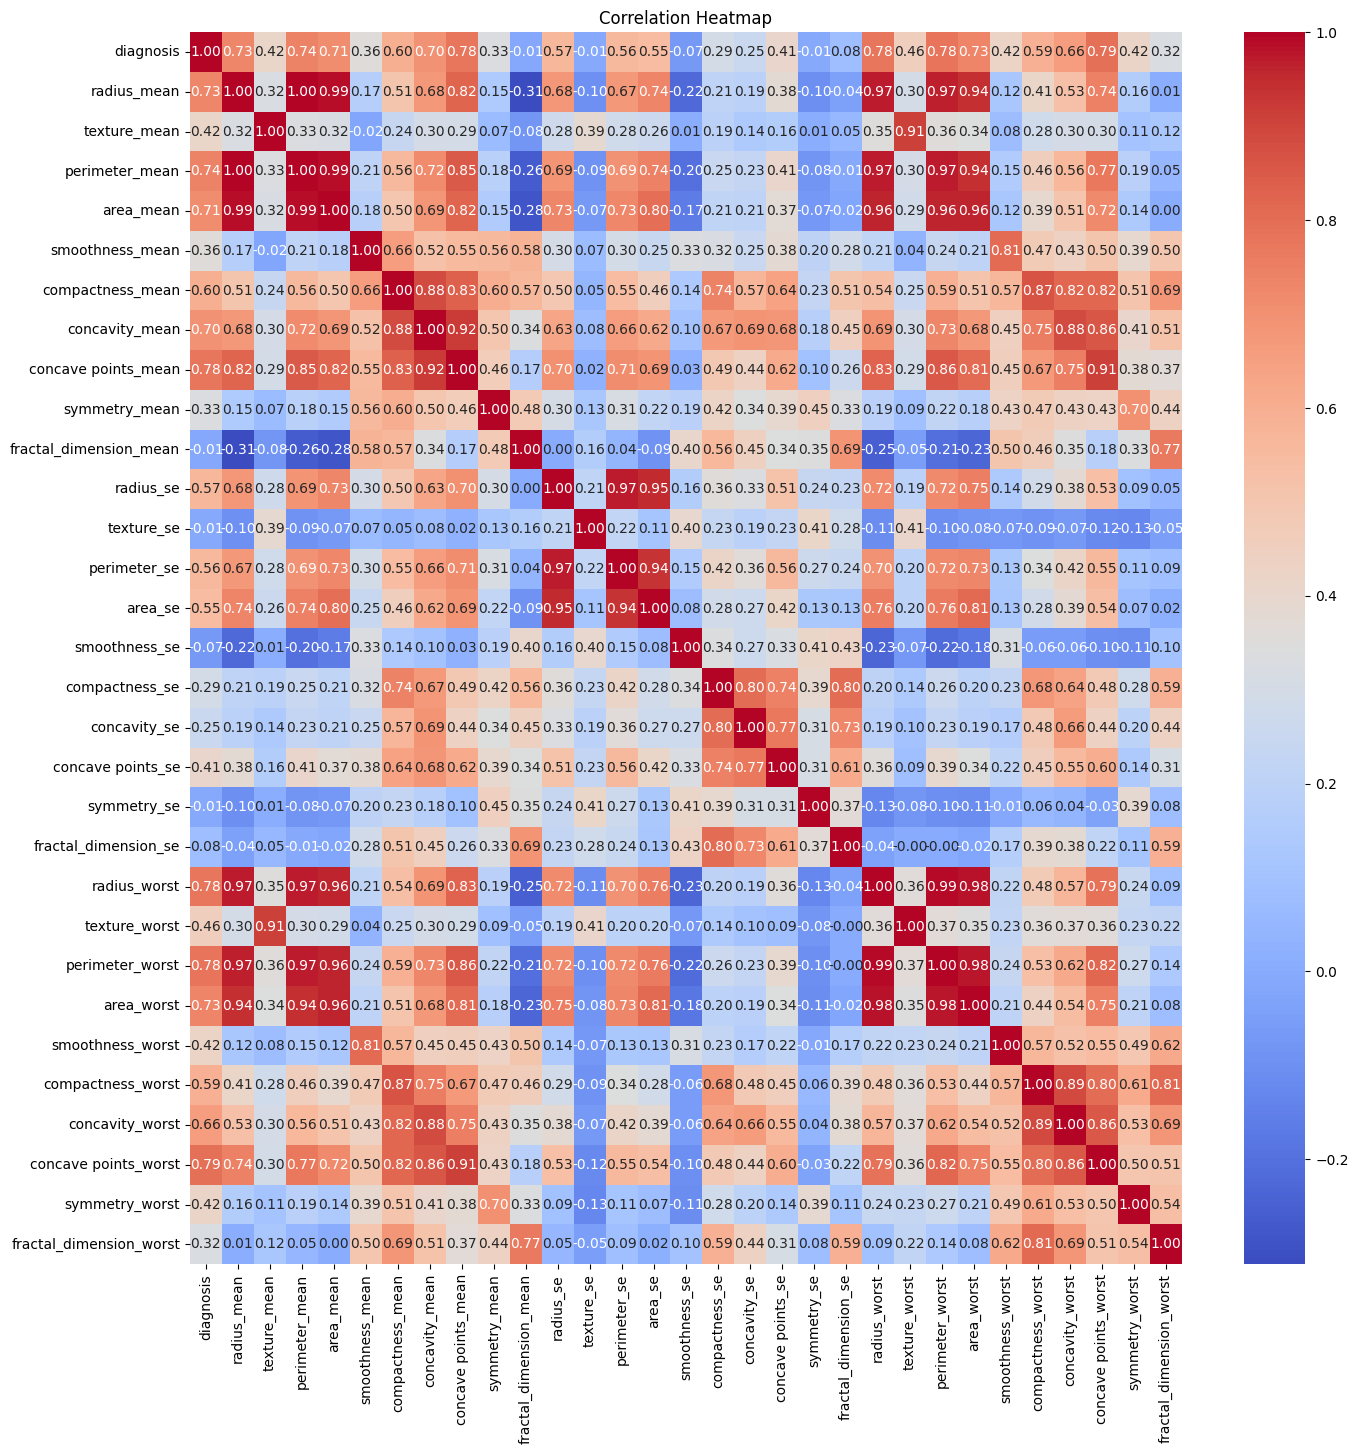

In [ ]:
# Create a heatmap to visualize correlation
plt.figure(figsize=(16, 16))
sns.heatmap(breast_Cancer.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From the above heatmap, it is observed that the radius_mean, perimeter_mean, area_mean considering only one among these, compactness_mean, concavity_mean, concave_points_mean are highly correlated whereas texture_mean and smoothness_mean, symmetry_mean and fractal_dimension_mean are less correlated compared to the features mentioned before.

Also, the other features like radius_se, perimeter_se, area_se are highly correlated considering only one among these whereas compactness_se, concavity_se and concave_points_se are little less correlated compared to the features mentioned before.

However, we remove the features that are highly correlated because high correlated features effect and do not improve the models like linear regression, random forests.

Removing such type of correlated features improves the learning algorithm faster. Considering less features mean high improvement in speed.

In [ ]:
import pandas as pd

# Assuming 'breast_Cancer' is your DataFrame
correlation_matrix = breast_Cancer.corr()

# Set a threshold for correlation
threshold = 0.5

# Select features with correlation above the threshold
high_correlation_features = (correlation_matrix['diagnosis'].abs() >= threshold)

# Display selected features
selected_features = correlation_matrix.index[high_correlation_features].tolist()
selected_features
processed_data=breast_Cancer[selected_features]

In [ ]:
breast_Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    int64  
 1   radius_mean           569 non-null    float64
 2   perimeter_mean        569 non-null    float64
 3   area_mean             569 non-null    float64
 4   compactness_mean      569 non-null    float64
 5   concavity_mean        569 non-null    float64
 6   concave points_mean   569 non-null    float64
 7   radius_se             569 non-null    float64
 8   perimeter_se          569 non-null    float64
 9   area_se               569 non-null    float64
 10  radius_worst          569 non-null    float64
 11  perimeter_worst       569 non-null    float64
 12  area_worst            569 non-null    float64
 13  compactness_worst     569 non-null    float64
 14  concavity_worst       569 non-null    float64
 15  concave points_worst  5

In [ ]:
X = processed_data.drop('diagnosis', axis=1)
y = processed_data['diagnosis']

In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


In [ ]:
# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the function to create the DNN model
def create_dnn_model():
    # Input layer
    input_layer = Input(shape=(X_train.shape[1],))

    # Hidden layers
    hidden1 = Dense(128, activation='relu')(input_layer)
    hidden2 = Dense(64, activation='relu')(hidden1)
    hidden3 = Dense(32, activation='relu')(hidden2)
    hidden4 = Dense(16, activation='relu')(hidden3)
    hidden5 = Dense(8, activation='relu')(hidden4)

    # Output layer
    output_layer = Dense(1, activation='sigmoid')(hidden5)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the model
dnn_model = create_dnn_model()

# Display the model summary
dnn_model.summary()

# Train the model
dnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = dnn_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

# Display metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {roc_auc:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 128)               2048      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9     

In [ ]:
# Evaluate the model on the train set
test_loss, test_accuracy = dnn_model.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


15/15 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9802
Test Loss: 0.0589
Test Accuracy: 0.9802


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

2/2 [==============================] - 0s 8ms/step - loss: 0.0272 - accuracy: 0.9825
Test Loss: 0.0272
Test Accuracy: 0.9825


In [ ]:
# Evaluate the model on the test set
y_pred = (dnn_model.predict(X_test) > 0.5).astype(int)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {roc_auc:.4f}')

2/2 [==============================] - 0s 3ms/step
AUC Score: 0.9878


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.3 MB/s eta 0:00:00


# Optimizing the Model using Kerastuner

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow import keras
import kerastuner as kt

# Define the hyperparameters and the search space for the Keras Tuner

def model_builder(hp):
    inputs = Input(shape=(X_train.shape[1],))

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    x = Dense(units=hp_units, activation='relu')(inputs)

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    outputs = Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')


Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [ ]:
# Search for the best hyperparameters using Keras Tuner
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


In [ ]:
# Build the tuned model and Train the tuned model
tuned_model = tuner.hypermodel.build(best_hps)
history = tuned_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
15/15 [==============================] - 1s 14ms/step - loss: 0.2740 - accuracy: 0.8923 - val_loss: 0.0449 - val_accuracy: 0.9825
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.9275 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1491 - accuracy: 0.9363 - val_loss: 0.0453 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1336 - accuracy: 0.9429 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1235 - accuracy: 0.9495 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.1139 - accuracy: 0.9538 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1058 - accuracy: 0.9604 - val_loss: 0.0514 - val_accuracy: 0.9649
Epoch 8/10
15/15 [=

In [ ]:
# Evaluate the model on the train set

test_loss, test_accuracy = tuned_model.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss:.4f}')
print(f'Trained Accuracy: {test_accuracy:.4f}')


15/15 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9670
Test Loss: 0.0776
Trained Accuracy: 0.9670


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = tuned_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

2/2 [==============================] - 0s 6ms/step - loss: 0.0397 - accuracy: 0.9649
Test Loss: 0.0397
Test Accuracy: 0.9649


In [ ]:
# Evaluate the model on the test set
y_pred = (tuned_model.predict(X_test) > 0.5).astype(int)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {roc_auc:.4f}')

2/2 [==============================] - 0s 6ms/step
AUC Score: 0.9566


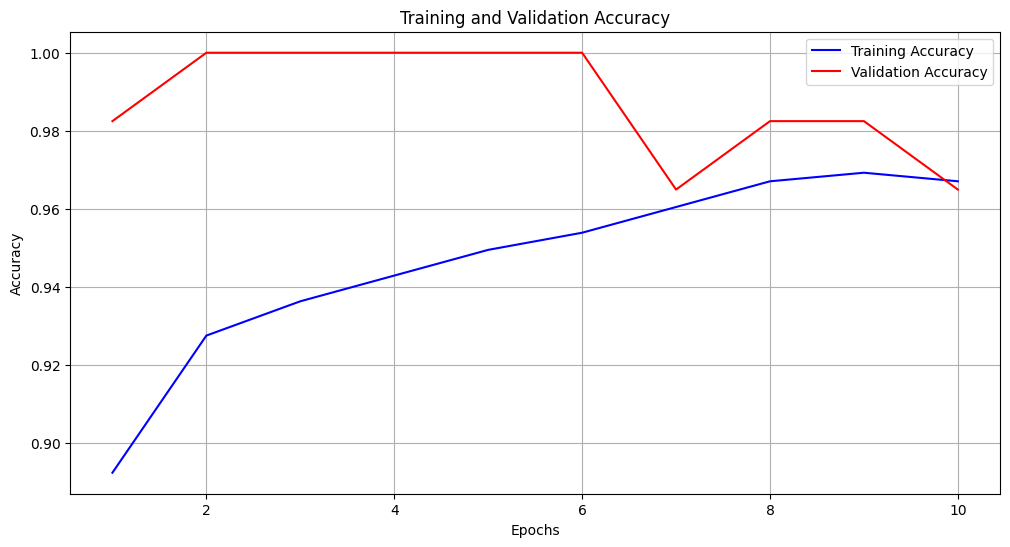

In [ ]:
import matplotlib.pyplot as plt

# Access the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## SAVING THE MODEL

---


In [ ]:
from tensorflow.keras.models import load_model

#Saving the scalar




In [ ]:
import pickle

In [ ]:
# pickle.dump(dnn_model,open('/content/dnn_model_saved','wb'))
tuned_model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
## load the saved model to use for prediction
Model_load=pickle.load(open('/content/dnn_model_saved','rb'))

In [ ]:
y_pred = (dnn_model.predict(X_test) > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC Score: {roc_auc:.4f}')

2/2 [==============================] - 0s 6ms/step
Accuracy: 0.9825
Precision: 0.9412
Recall: 1.0000
AUC Score: 0.9878


In [ ]:
import pickle
with open('scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)